otsu thresholdig

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [37]:

image_path = "./dataset/1.BMP"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)




In [38]:
# Calculate histogram
hist, bins = np.histogram(image, bins=256, range=[0, 256])
total_pixels = image.shape[0] * image.shape[1]


In [39]:
max_variance = 0
best_threshold = 0

In [40]:

for threshold in range(256):
    p1 = np.sum(hist[:threshold]) / total_pixels
    p2 = np.sum(hist[threshold:]) / total_pixels

    #means
    m1 = np.sum(np.arange(threshold) * hist[:threshold]) / (p1 * total_pixels)
    m2 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (p2 * total_pixels)

    #class variance
    variance = p1 * p2 * (m1 - m2) ** 2
    if variance > max_variance:
        max_variance = variance
        best_threshold = threshold

#thresholding
binary_image = (image > best_threshold).astype(np.uint8) * 255


C:\Users\User\AppData\Local\Temp\ipykernel_4124\1206899504.py:6: RuntimeWarning: invalid value encountered in scalar divide
  m1 = np.sum(np.arange(threshold) * hist[:threshold]) / (p1 * total_pixels)
C:\Users\User\AppData\Local\Temp\ipykernel_4124\1206899504.py:7: RuntimeWarning: invalid value encountered in scalar divide
  m2 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (p2 * total_pixels)


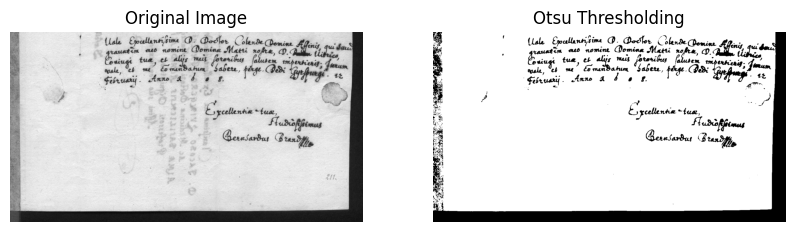

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')

plt.show()

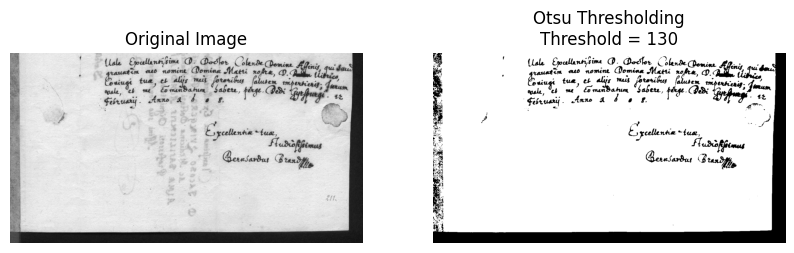

Processed 1.bmp: Optimal threshold value = 130


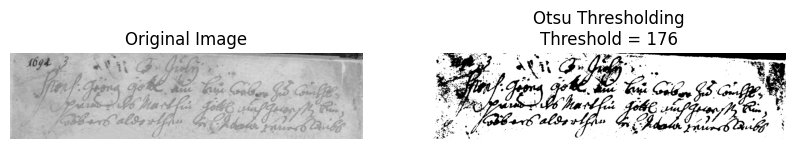

Processed 10.bmp: Optimal threshold value = 176


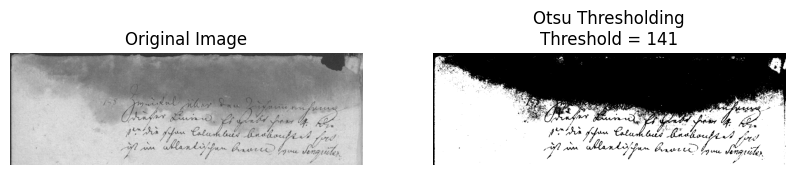

Processed 2.bmp: Optimal threshold value = 141


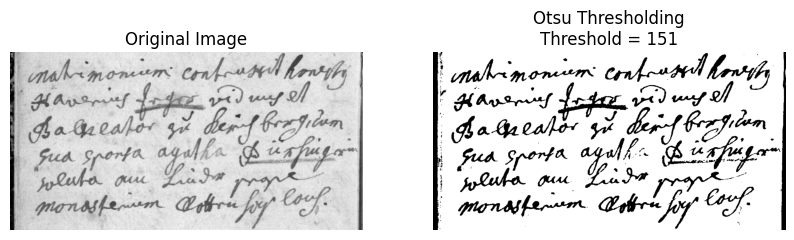

Processed 3.bmp: Optimal threshold value = 151


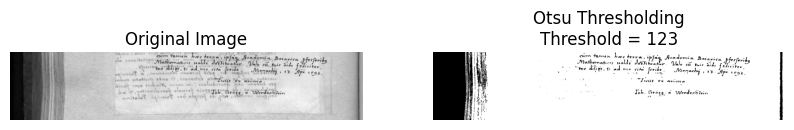

Processed 4.bmp: Optimal threshold value = 123


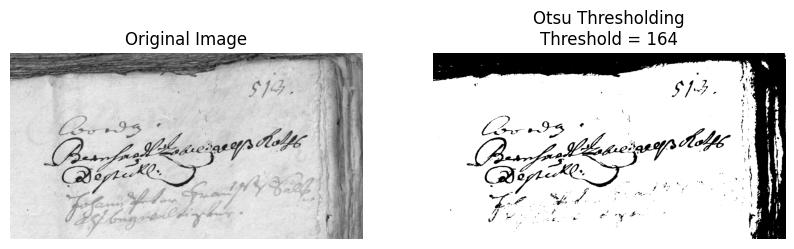

Processed 5.bmp: Optimal threshold value = 164


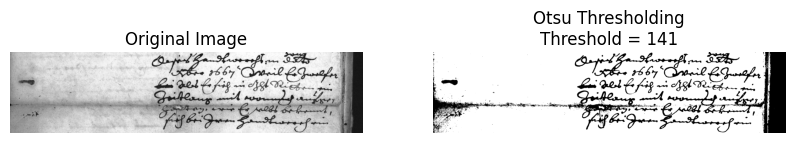

Processed 6.bmp: Optimal threshold value = 141


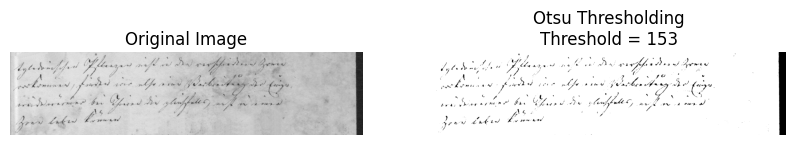

Processed 7.bmp: Optimal threshold value = 153


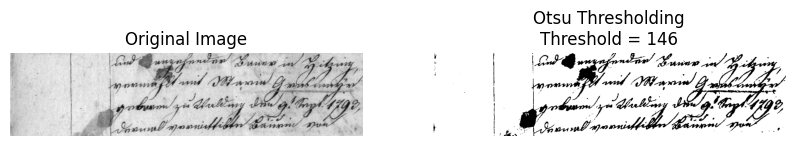

Processed 8.bmp: Optimal threshold value = 146


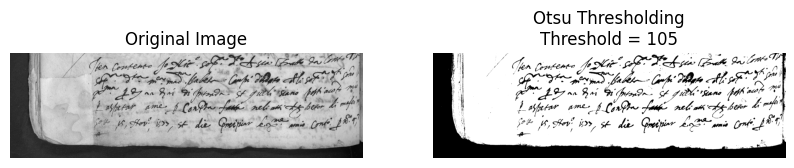

Processed 9.bmp: Optimal threshold value = 105


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_path = "./dataset/"
image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    # Calculate histogram
    hist, bins = np.histogram(image, bins=256, range=[0, 256])
    total_pixels = image.shape[0] * image.shape[1]
    
    max_variance = 0
    best_threshold = 0
    
    for threshold in range(256):
        
        p1 = np.sum(hist[:threshold]) / total_pixels
        p2 = np.sum(hist[threshold:]) / total_pixels
        
        
        m1 = np.sum(np.arange(threshold) * hist[:threshold]) / (p1 * total_pixels) if p1 != 0 else 0
        m2 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (p2 * total_pixels) if p2 != 0 else 0
        
        variance = p1 * p2 * (m1 - m2) ** 2
        if variance > max_variance:
            max_variance = variance
            best_threshold = threshold
    
    binary_image = (image > best_threshold).astype(np.uint8) * 255
    
   
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Otsu Thresholding\nThreshold = {best_threshold}")
    plt.axis('off')
    
    plt.show()
    
    print(f"Processed {image_file}: Optimal threshold value = {best_threshold}")
